<a href="https://colab.research.google.com/github/sujiny123/project/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목차
**1. 데이터로딩**\
**2. 문제정의**\
**3. 피처 스케일링**\
**4. 모델링**\
**5. 결과**

# 데이터 로딩

In [ ]:
! pip install mglearn
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.2 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)

# 문제정의
- 채무불이행상태를 분류 알고리즘으로 예측한다.
- 데이터셋 https://www.kaggle.com/datasets/manishtripathi86/deloitte-hackathon-predict-the-loan-defaulter?select=train.csv

## 주제선정이유

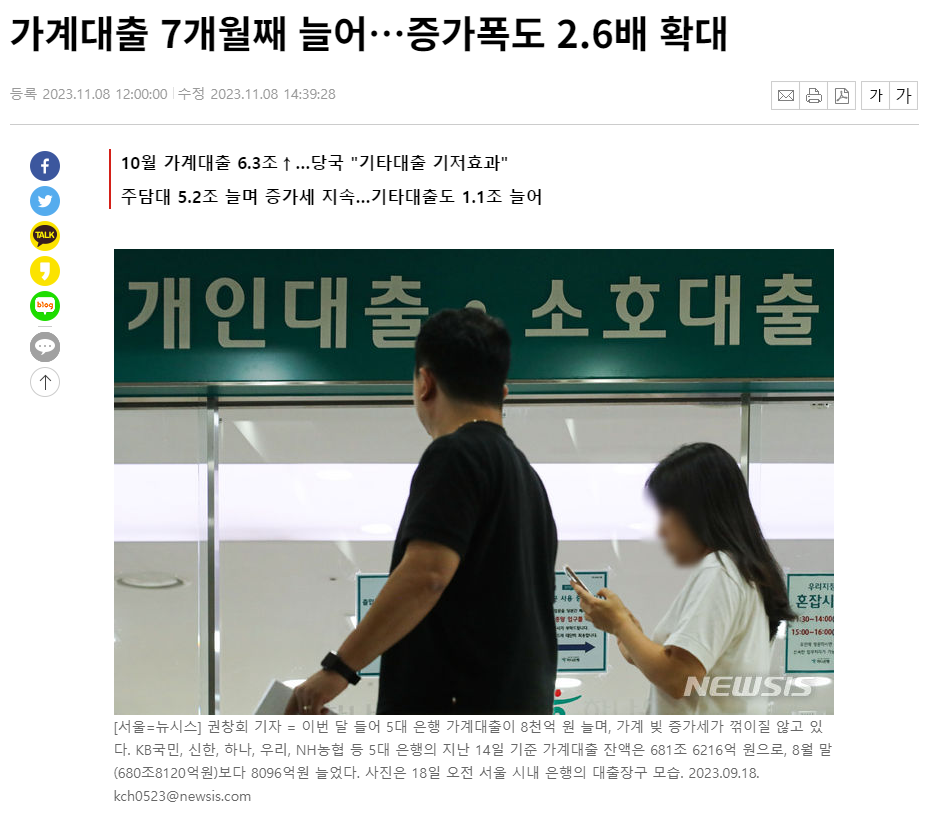

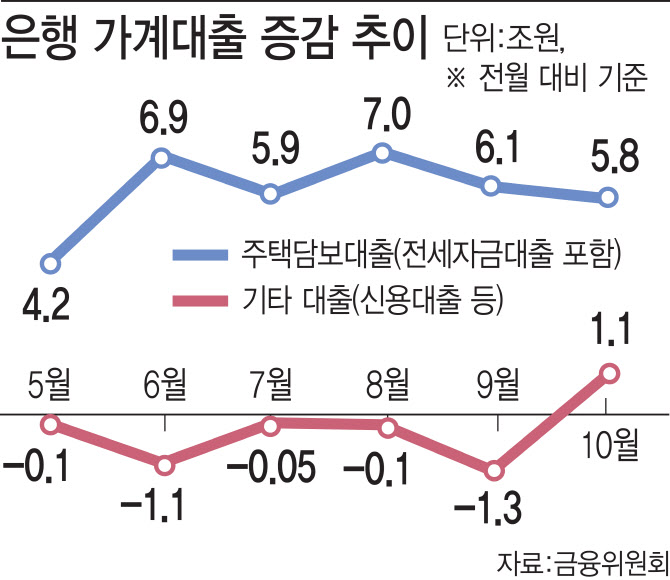

In [ ]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,67463.0,2.562761e+07,2.109155e+07,1.297933e+06,6.570288e+06,1.791565e+07,4.271521e+07,7.224578e+07
Loan Amount,67463.0,1.684890e+04,8.367866e+03,1.014000e+03,1.001200e+04,1.607300e+04,2.210600e+04,3.500000e+04
Funded Amount,67463.0,1.577060e+04,8.150993e+03,1.014000e+03,9.266500e+03,1.304200e+04,2.179300e+04,3.499900e+04
Funded Amount Investor,67463.0,1.462180e+04,6.785345e+03,1.114590e+03,9.831685e+03,1.279368e+04,1.780759e+04,3.499975e+04
Term,67463.0,5.817381e+01,3.327441e+00,3.600000e+01,5.800000e+01,5.900000e+01,5.900000e+01,5.900000e+01
Interest Rate,67463.0,1.184626e+01,3.718629e+00,5.320006e+00,9.297147e+00,1.137770e+01,1.419353e+01,2.718235e+01
Home Ownership,67463.0,8.054150e+04,4.502912e+04,1.457354e+04,5.168984e+04,6.933583e+04,9.462332e+04,4.065615e+05
Debit to Income,67463.0,2.329924e+01,8.451824e+00,6.752991e-01,1.675642e+01,2.265666e+01,3.004840e+01,3.962986e+01
Delinquency - two years,67463.0,3.271275e-01,8.008884e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
Inquires - six months,67463.0,1.457540e-01,4.732913e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


# 피처 내용
- ID : 아이디
- Loan Amount : 대출금액
- Funded Amount : 펀딩금액
- Funded Amount Investor : 투자자가 펀딩한 금액
- Term : 기간
- Batch Enrolled : 등록번호
- Interest Rate : 이율
- Grade : 등급
- Sub Grade : 하위등급
- Employment Duration : 대출형태
- Home Ownership : 보증금
- Verification Status : 검증상태
- Payment Plan : 상환 계획
- Loan Title : 대출 주제
- Debt to Income : 총 부채 상환비율
- Delinquency - two years : 연체횟수
- Inquires - six months : 조회횟수
- Open Account : 계좌 개설 횟수
- Public Record : 소송기록
- Revolving Balance : 리볼빙 잔액
- Revolving Utilities : 리볼빙 횟수
- Total Accounts : 총 계좌
- Initial List Status : 이상적 리스트 상태?
- Total Received Interest : 총 이율
- Total Received Late Fee : 총 연체료
- Recoveries : 회수
- Collection Recovery Fee : 회수수수료
- Collection 12 months Medical : 12개월 회수
- Application Type : 타입
- Last week Pay : 지난주 지불
- Accounts Delinquent : 연체 계좌
- Total Collection Amount : 총 회수금액
- Total Current Balance : 총 현재 잔액
- Total Revolving Credit Limit : 총 리볼빙 신용카드 한도
- **Loan Status : 체불상태(Target)**

# 피처 스케일링

In [ ]:
df['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

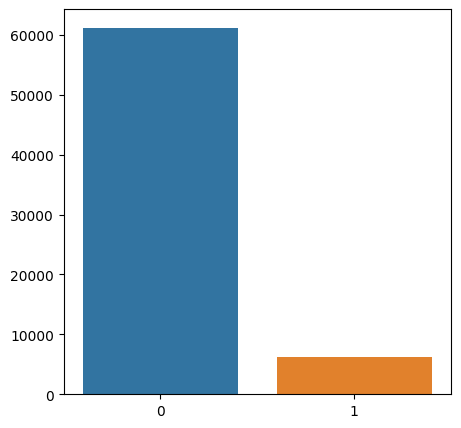

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x=[0,1], y=[df['Loan Status'].value_counts()[0],df['Loan Status'].value_counts()[1]])
plt.show()

- 0 : 채불하지 않은 사람
- 1 : 채불한 사람

=> 채불한 사람에 비해 채불하지 않은사람이 10배 이상 많다.

In [ ]:
df['Accounts Delinquent'].value_counts()

0    67463
Name: Accounts Delinquent, dtype: int64

- 'Accounts Delingquent'는 모든셀이 0이므로 제거한다.

In [ ]:
df.drop('Accounts Delinquent', axis=1, inplace=True)

In [ ]:
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [ ]:
df['Grade'].value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

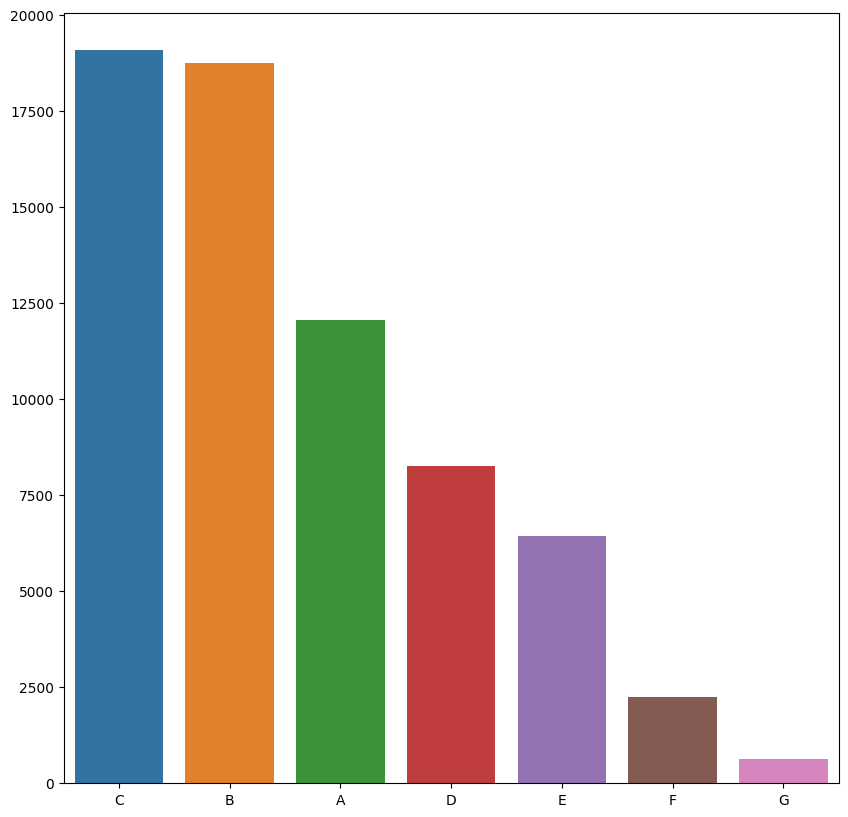

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=['C','B','A','D','E','F','G'], y=[df['Grade'].value_counts()[0],df['Grade'].value_counts()[1],df['Grade'].value_counts()[2],df['Grade'].value_counts()[3],df['Grade'].value_counts()[4],df['Grade'].value_counts()[5],df['Grade'].value_counts()[6]])
plt.show()

In [ ]:
df.groupby('Grade')['Loan Status'].sum().sort_values(ascending=False)

Grade
C    1792
B    1635
A    1100
D     796
E     618
F     233
G      67
Name: Loan Status, dtype: int64

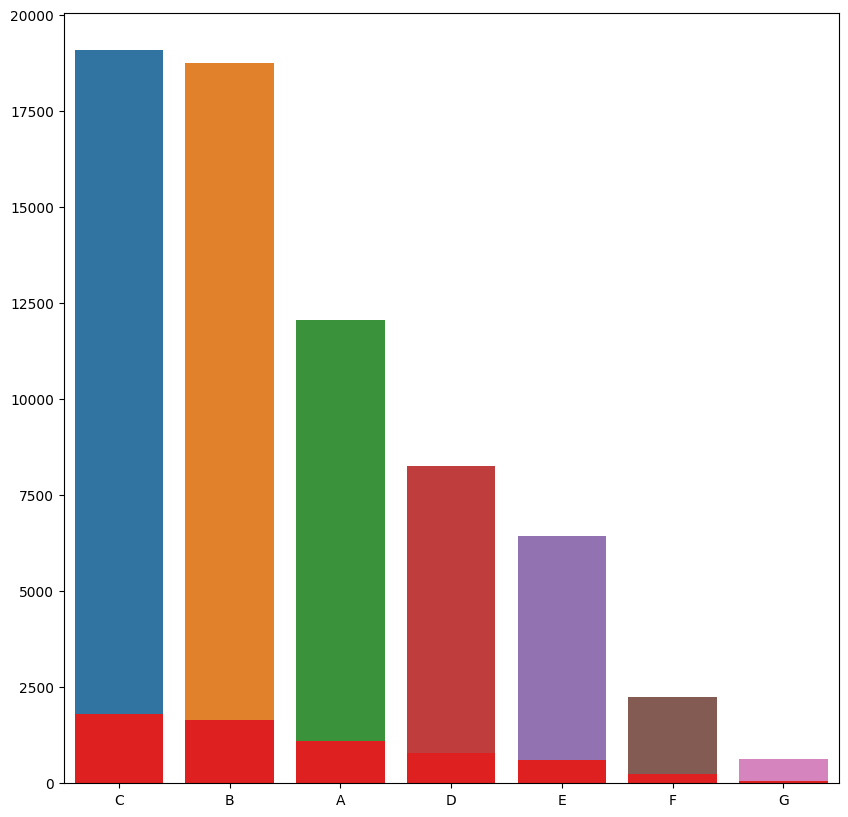

In [ ]:
a = df.groupby('Grade')['Loan Status'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=['C','B','A','D','E','F','G'], y=[df['Grade'].value_counts()[0],df['Grade'].value_counts()[1],df['Grade'].value_counts()[2],df['Grade'].value_counts()[3],df['Grade'].value_counts()[4],df['Grade'].value_counts()[5],df['Grade'].value_counts()[6]])
sns.barplot(x=['C','B','A','D','E','F','G'], y=[a[0], a[1], a[2], a[3], a[4], a[5], a[6]] , color='red')
plt.show()

In [ ]:
sg = df['Sub Grade'].value_counts()
sg_loan = df.groupby('Sub Grade')['Loan Status'].sum().sort_values(ascending=False)

In [ ]:
print(sg, sg_loan)

B4    4462
C1    4188
B3    3999
A5    3540
B2    3520
B5    3408
D1    3304
C4    3250
C2    3219
C3    3121
B1    2924
C5    2472
A4    2264
D4    2050
D2    1963
D5    1952
A2    1837
D3    1824
E2    1746
A3    1685
A1    1364
E3    1321
E1    1298
E4    1117
F2     947
F1     824
E5     769
F5     582
F3     578
G2     447
F4     441
G1     366
G5     284
G3     246
G4     151
Name: Sub Grade, dtype: int64 Sub Grade
B4    410
A5    333
B3    330
C1    329
B5    326
B2    313
D1    309
C4    304
C2    303
C3    294
B1    292
C5    237
A4    207
D5    202
D2    192
D4    185
A2    180
D3    164
A3    159
E2    155
E1    131
A1    125
E3    118
E4    114
F2     95
F1     72
E5     62
F3     57
F5     53
F4     44
G2     36
G1     35
G3     32
G5     28
G4     15
Name: Loan Status, dtype: int64


In [ ]:
sg_df = pd.DataFrame(sg)
sg_loan_df = pd.DataFrame(sg_loan)

In [ ]:
sg_df['index'] = sg_df.index

In [ ]:
sg_loan_df['index'] = sg_loan_df.index

In [ ]:
sg_df.shape, sg_loan_df.shape

((35, 2), (35, 2))

In [ ]:
sgsg=pd.merge(sg_df, sg_loan_df, on='index')

In [ ]:
sgsg['Loan Status'][0]

410

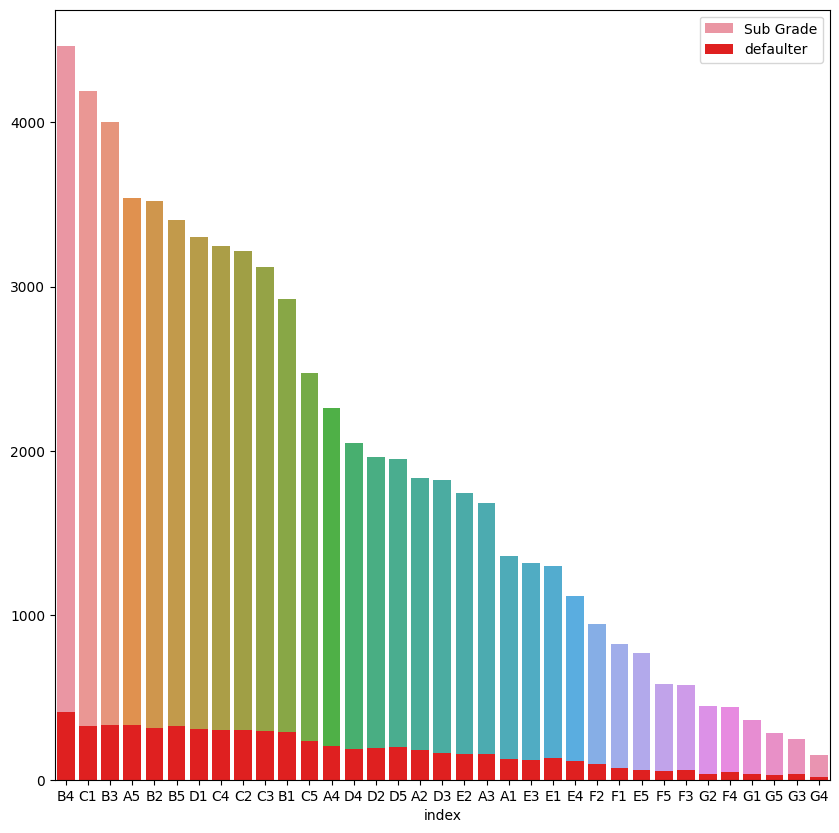

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=sgsg['index'], y=[sgsg['Sub Grade'][i] for i in range(0,35)], label='Sub Grade')
sns.barplot(x=sgsg['index'], y=[sgsg['Loan Status'][i] for i in range(0,35)] , color='red', label='defaulter')
plt.legend()
plt.show()

- 'Grade'와 'Sub Grade'를 비교해 봤을 때 'Grade'와 체납자수의 내림차순은 항목이 일치했지만, 'Sub Grade'와 체납자수의 내림차순의 항목이 일치하지 않았다.
=> **따라서 'Sub Grade'보다는 'Grade'를 요소에 넣는 것이 낫다고 판단했다.**

In [ ]:
df.drop('Sub Grade', axis=1, inplace=True)

In [ ]:
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,MORTGAGE,83961.15003,Verified,n,Credit card refinancing,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,RENT,65491.12817,Source Verified,n,Credit card refinancing,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,MORTGAGE,34813.96985,Verified,n,Lending loan,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,OWN,96938.83564,Not Verified,n,Debt consolidation,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,61,361339,39075,0


In [ ]:
df['Employment Duration'].value_counts()

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64

- 'Employment Duration'은 3가지 타입으로 본인집, 빌린집, 대출있는집으로 보고 본인집일 경우 0, 빌린집일 경우 1, 대출있는집일 경우 2로 설정한다.

In [ ]:
df['Employment Duration'][1]

'RENT'

In [ ]:
for i in range(len(df)):
  if df['Employment Duration'][i] == 'OWN':
    df['Employment Duration'][i] = 0
  elif df['Employment Duration'][i] == 'RENT':
    df['Employment Duration'][i] = 1
  else:
    df['Employment Duration'][i] = 2

In [ ]:
df['Employment Duration'].value_counts()

2    36351
1    24150
0     6962
Name: Employment Duration, dtype: int64

In [ ]:
df['Loan Title'].value_counts()

Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
                           ...  
Home loan                      6
Personal loan                  5
Getting Ahead                  5
Credit                         4
bills                          4
Name: Loan Title, Length: 109, dtype: int64

- 'Loan Title'은 대출 제목인데 ID와 마찬가지로 채불 상태에 영향을 준다고 판단하지 않았다.

In [ ]:
df.drop('Loan Title', axis=1, inplace=True)

In [ ]:
df['Payment Plan'].value_counts()

n    67463
Name: Payment Plan, dtype: int64

- 'Payment Plan'은 다 n이므로 삭제

In [ ]:
df.drop('Payment Plan', axis=1, inplace=True)

In [ ]:
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,2,176346.62670,Not Verified,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,1,39833.92100,Source Verified,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,2,91506.69105,Source Verified,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,2,108286.57590,Source Verified,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,2,44234.82545,Source Verified,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,2,83961.15003,Verified,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,1,65491.12817,Source Verified,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,2,34813.96985,Verified,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,0,96938.83564,Not Verified,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,61,361339,39075,0


In [ ]:
df['Verification Status'].value_counts()

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64

- 'Verification Status'는 검증받은 상태인데 검증받지 않은 상태를 2, Source Verified를 1, 검증받은 상태를 0으로 판단했다.

In [ ]:
for i in range(len(df)):
  if df['Verification Status'][i] == 'Not Verified':
    df['Verification Status'][i] = 2
  elif df['Verification Status'][i] == 'Verified':
    df['Verification Status'][i] = 0
  else:
    df['Verification Status'][i] = 1

In [ ]:
df['Verification Status'].value_counts()

1    33036
0    18078
2    16349
Name: Verification Status, dtype: int64

In [ ]:
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,2,176346.62670,2,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,1,39833.92100,1,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,2,91506.69105,1,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,2,108286.57590,1,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,2,44234.82545,1,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,2,83961.15003,0,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,1,65491.12817,1,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,2,34813.96985,0,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,0,96938.83564,2,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,61,361339,39075,0


In [ ]:
df['Initial List Status'].value_counts()

w    36299
f    31164
Name: Initial List Status, dtype: int64

In [ ]:
df.groupby('Initial List Status')['Loan Status'].sum()

Initial List Status
f    3014
w    3227
Name: Loan Status, dtype: int64

In [ ]:
df['Application Type'].value_counts()

INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64

In [ ]:
df.groupby('Application Type')['Loan Status'].sum()

Application Type
INDIVIDUAL    6230
JOINT           11
Name: Loan Status, dtype: int64

In [ ]:
df['Term'].value_counts()

59    43780
58    22226
36     1457
Name: Term, dtype: int64

In [ ]:
df.groupby('Term')['Loan Status'].sum()

Term
36     154
58    1836
59    4251
Name: Loan Status, dtype: int64

- 'ID'와 'Batch Enrolled'는 채불과는 무관하므로 삭제

In [ ]:
df.drop(['ID','Batch Enrolled'], axis=1, inplace=True)

- 'Initial List Status'와 'Application Type', 'Grade', 'Term' 는 원핫인코딩 한다.

In [ ]:
df_dum = pd.get_dummies(data=df,columns=['Application Type','Initial List Status','Grade','Term'], drop_first=True)

In [ ]:
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,B,2,176346.62670,2,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,C,1,39833.92100,1,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,F,2,91506.69105,1,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,C,2,108286.57590,1,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,C,2,44234.82545,1,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,59,9.408858,C,2,83961.15003,0,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,48,181775,34301,1
67459,8323,11046,15637.46301,59,9.972104,C,1,65491.12817,1,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,37,22692,8714,0
67460,15897,32921,12329.45775,59,19.650943,A,2,34813.96985,0,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,17,176857,42330,0
67461,16567,4975,21353.68465,59,13.169095,D,0,96938.83564,2,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,61,361339,39075,0


# 모델링

## 랜덤포레스트

- 랜덤 포레스트는 앙상블 머신러닝 모델이다. 다수의 의사결정 트리를 만들고, 그 나무들의 분류를 집계해서 최종적으로 분류한다.

- 오버피팅을 피하기 위해 임의(random)의 숲을 구성한다. 다수의 나무들로부터 분류를 집계하기 때문에 오버피팅이 나타나는 나무의 영향력을 줄일 수 있다.

- 모든 의사결정 트리는 학습 데이터 세트에서 임의로 하위 데이터 세트를 추출하여 생성된다. 중복을 허용하기 때문에 단일 데이터가 여러번 선택될 수도 있다. 이 과정을 배깅(bagging)이라고 한다.

- 나무를 만들 때는 모든 속성(feature)들에서 임의로 일부를 선택하고 그 중 정보 획득량이 가장 높은 것을 기준으로 데이터를 분할한다. 만약 데이터 세트에 n개의 속성이 있는 경우 n제곱근 개수만큼 무작위로 선택하는 것이 일반적이다.


![](https://i.ibb.co/s2HfyMs/rf01.png)

In [ ]:
data = df_dum.drop('Loan Status',axis=1)

In [ ]:
target = df['Loan Status']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, stratify=target, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_scaled = ss.fit_transform(x_train)
test_scaled = ss.fit_transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(train_scaled, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

In [ ]:
scores = cross_validate(rf, train_scaled, y_train, n_jobs=-1, return_train_score=True)

In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9999444135630906 0.9074856401704651


In [ ]:
pred=rf.predict(test_scaled)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12245
           1       0.00      0.00      0.00      1248

    accuracy                           0.91     13493
   macro avg       0.45      0.50      0.48     13493
weighted avg       0.82      0.91      0.86     13493



In [ ]:
from sklearn.metrics import log_loss

rf.fit(train_scaled, y_train)
y_pred = rf.predict_proba(test_scaled)
log_loss(y_test, y_pred)

0.3270219377269428

## 엑스트라 트리
- 엑스트라 트리는 랜덤포레스트와 비슷하게 동작하는데 기본적으로 100개의 결정트리를 훈련시키며, 전체 특성 중 일부 특성을 랜덤하게 선택하여 노드를 분할하기 위해 사용한다.

- 랜덤 포레스트와 엑스트라 트리의 차이점은 부트스트랩 샘플(중복된 훈련 샘플)을 사용하지 않는다는 점에 있다. 엑스트라 트리는 결정 트리를 만들어 낼 때 훈련 세트 전체를 사용하기 때문에 Bagging이라고는 할수 없다.

- 또 랜덤포레스트는 주어진 모든 feature에 대한 정보이득을 계산하고 가장 높은 정보 이득을 가지는 feature를 Split Node로 선택하고 그것들을 전부 비교해서 가장 최선의 feature를 선정한다. 이 과정을 통해 성능이 좋은 결정트리를 만들 수 있지만 연산량이 많이 든다는 단점이 있다.

- 엑스트라 트리는 Split을 할 때 무작위로 feature를 선정한다. feature중에 아무거나 고른 다음 그 feature에 대해서 최적의 Node를 분할한다. 성능이 낮아지지만 생각보다 준수한 성능을 보이고 과대적합을 막고 검증 세트의 점수를 높이는 효과가 있다. 그리고 속도가 빠르다는 장점이 있다.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
et.fit(train_scaled, y_train)
scores = cross_validate(et,train_scaled, y_train, return_train_score=True, n_jobs=-1)

In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9074856401704651


In [ ]:
from sklearn.metrics import log_loss

et.fit(train_scaled, y_train)
y_pred = et.predict_proba(test_scaled)
log_loss(y_test, y_pred)

0.31672413477614814

## XGBoost
- 그라디언트 부스팅이 병렬 학습 지원이 되지 않아 순차적으로 데이터를 학습하는 데 시간이 많이 걸린다면 이 알고리즘을 병렬 학습이 지원되도록 구현한 것이 XGBoost이다. XGBoost는 병렬 학습을 위해 다양한 트리빌딩 방법, 분산 컴퓨팅 시스템, 그리고 GPU 등을 지원한다.

- 병렬트리 빌딩에서는 그라디언트 부스팅 알고리즘은 분기할 때마다 모든 피처의 모든 데이터 값을 고려해 손실함수, 즉 MSE 혹은 지니계수가 가장 낮아지는 최적의 분기점을 계산해 분할해 나갔다. XGboost의 핵심 아이디어는 각 피처 데이터들을 일정 간격으로 나눠 최적의 분기점을 찾는다는 것이다. 일정 간격으로 나눠진 데이터셋 안에서 최고의 split을 찾는 과정을 병렬 처리할 수 있는 것이다.


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method = 'hist', random_state=42)

In [ ]:
scores = cross_validate(xgb, train_scaled, y_train, return_train_score=True, n_jobs=-1)

In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9279692421715768 0.9062256809338521


In [ ]:
from sklearn.metrics import log_loss

xgb.fit(train_scaled, y_train)
y_pred = xgb.predict_proba(test_scaled)
log_loss(y_test, y_pred)

0.32797209829926155

## Extra Tree 그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 200, 300],
          'max_depth' : [3, 5, 10],
          'min_samples_split' : [1,5,10]}
gs = GridSearchCV(et, params, n_jobs=-1)
gs.fit(train_scaled, y_train)

GridSearchCV(estimator=ExtraTreesClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [1, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
dt = gs.best_estimator_
print(dt.score(train_scaled, y_train))
print(dt.score(test_scaled, y_test))

0.9074856401704651
0.9075075965315349


In [ ]:
gs.best_params_

{'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}

In [ ]:
et = ExtraTreesClassifier(n_jobs=-1, random_state=42, max_depth= 3, min_samples_split= 5, n_estimators= 100)
et.fit(train_scaled, y_train)
scores = cross_validate(et,train_scaled, y_train, return_train_score=True, n_jobs=-1)

In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9074856401704651 0.9074856401704651


In [ ]:
y_pred = et.predict_proba(test_scaled)
log_loss(y_test, y_pred)

0.3079971974286394

## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)

pca.fit(train_scaled)
df_pca = pca.transform(train_scaled)
pca_test = pca.transform(test_scaled)

In [ ]:
df_pca

array([[ 1.75358252, -0.51786325, -0.28636423, ..., -1.3599174 ,
        -0.89741558,  0.47380316],
       [ 1.50046103, -2.02670802,  0.04694281, ...,  0.28726982,
        -0.10118117,  2.3047813 ],
       [-0.74969395,  0.83186908,  0.86967601, ...,  0.42700863,
         1.12358774,  0.88436578],
       ...,
       [-0.47988761,  2.1356665 ,  0.65336352, ...,  1.44395562,
        -0.80799085,  0.24385297],
       [ 1.84563092, -0.13710079, -1.34259797, ...,  0.6881222 ,
        -0.43200422, -0.1919555 ],
       [-1.39008406, -1.91904805,  0.93658154, ..., -0.08354604,
        -0.50401375, -0.48966415]])

In [ ]:
et.fit(df_pca, y_train)
scores = cross_validate(et, df_pca, y_train, n_jobs=-1, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9074856401704651 0.9074856401704651


In [ ]:
y_pred = et.predict_proba(pca_test)
log_loss(y_test, y_pred)

0.30817449799890545

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_over, y_train_over = smote.fit_resample(train_scaled, y_train)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(x_train_over, y_train_over)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
scores = cross_validate(rf, x_train_over, y_train_over, n_jobs=-1, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9496501583987751


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve
def get(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차행렬(혼동 행렬)')
  print(confusion)

  print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, F1:{f1:.4f}, AUC:{roc_auc:.4f}')


In [ ]:
pred = rf.predict(test_scaled)
pred_proba = rf.predict_proba(test_scaled)[:,1]

In [ ]:
get(y_test, pred, pred_proba)

오차행렬(혼동 행렬)
[[  645 11600]
 [   66  1182]]
정확도:0.1354, 정밀도:0.0925, 재현율:0.9471, F1:0.1685, AUC:0.5121


- SMOTE를 했기 때문에 재현율이 증가한다.

In [ ]:
from sklearn.metrics import log_loss

et.fit(x_train_over, y_train_over)
y_pred = et.predict_proba(test_scaled)
log_loss(y_test, y_pred)

0.6837795878502004

## 결과

In [ ]:
pred=et.predict(test_scaled)

In [ ]:
actual = pd.DataFrame(y_test)

In [ ]:
actual = actual.values.reshape(1,-1)

In [ ]:
np.concatenate(actual)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
a = pd.DataFrame({'pred':pred,'actual':np.concatenate(actual)})

In [ ]:
a['match']=[None]*13493
for i in range(len(a)):
  if a['pred'][i:i+1].values == a['actual'][i:i+1].values:
    a['match'][i:i+1]=1
  else:
    a['match'][i:i+1]=0

In [ ]:
a

,pred,actual,match
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
13488,0,0,1
13489,0,0,1
13490,0,0,1
13491,0,0,1


In [ ]:
a['match'].value_counts()

1    12245
0     1248
Name: match, dtype: int64

- 13493개중 12245개를 맞추고 1248개를 맞추지 못했다.
- **12245/13493*100 = 90.75%**

In [ ]:
df.corr(method='pearson')

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
Loan Amount,1.000000,-0.000551,0.002831,0.004277,-0.004888,0.016691,0.007959,-0.000469,0.008962,0.009088,-0.002542,-0.001738,0.014828,-0.002071,-0.001887,-0.000034,-0.001606,-0.002142,-0.002726,-0.002362,-0.004135,-0.008285,0.002289,-0.004473
Funded Amount,-0.000551,1.000000,0.010227,-0.001503,0.002310,-0.003518,0.002347,0.011313,-0.001587,0.005755,0.003750,-0.004485,0.004460,0.008298,0.002759,0.001542,0.000462,0.000175,0.001071,-0.003476,-0.002821,-0.001499,0.006145,0.001364
Funded Amount Investor,0.002831,0.010227,1.000000,-0.008943,-0.001917,0.001339,0.000112,0.001925,-0.003073,-0.007850,0.005002,-0.009102,-0.003027,0.003191,0.001432,-0.000232,0.000966,-0.007272,0.001814,0.004248,0.006862,0.003283,0.005669,-0.000091
Term,0.004277,-0.001503,-0.008943,1.000000,-0.012688,-0.021813,0.001026,-0.004494,-0.005272,0.021362,-0.002827,-0.002317,-0.010018,0.001204,0.008663,-0.000736,-0.003475,-0.001203,-0.003263,0.007035,0.000358,0.003361,-0.005068,-0.003410
Interest Rate,-0.004888,0.002310,-0.001917,-0.012688,1.000000,0.005467,-0.011203,0.004045,0.009172,-0.003250,0.006979,0.018999,0.006089,0.006584,0.006998,0.003119,0.009348,0.001281,-0.009895,-0.012652,0.002771,-0.002567,0.016651,0.002900
Home Ownership,0.016691,-0.003518,0.001339,-0.021813,0.005467,1.000000,0.022781,-0.003793,0.005024,0.009080,0.005631,0.016783,-0.005556,0.021452,-0.010346,0.004011,0.004399,-0.003821,-0.002639,-0.004573,0.006314,0.007117,0.005008,0.003716
Debit to Income,0.007959,0.002347,0.000112,0.001026,-0.011203,0.022781,1.000000,-0.004007,0.002246,0.001100,-0.007813,-0.011414,0.003691,-0.005683,0.006504,-0.010224,-0.009693,0.002200,-0.000716,0.008639,0.001555,-0.011582,-0.007236,-0.003057
Delinquency - two years,-0.000469,0.011313,0.001925,-0.004494,0.004045,-0.003793,-0.004007,1.000000,0.014679,0.004904,0.006716,0.009394,0.002474,-0.003085,-0.004511,0.007943,0.017348,0.002707,0.003451,0.001160,0.005642,0.002602,0.009315,0.009990
Inquires - six months,0.008962,-0.001587,-0.003073,-0.005272,0.009172,0.005024,0.002246,0.014679,1.000000,-0.002109,0.004087,0.002457,0.005150,0.007562,0.009556,0.008296,0.012487,0.008388,-0.004436,-0.004453,-0.002210,0.001531,0.004678,0.000578
Open Account,0.009088,0.005755,-0.007850,0.021362,-0.003250,0.009080,0.001100,0.004904,-0.002109,1.000000,-0.010762,0.010988,0.007090,0.003486,0.012980,0.000828,-0.001216,-0.006832,0.003397,-0.013415,-0.006176,-0.007470,0.003096,-0.007073


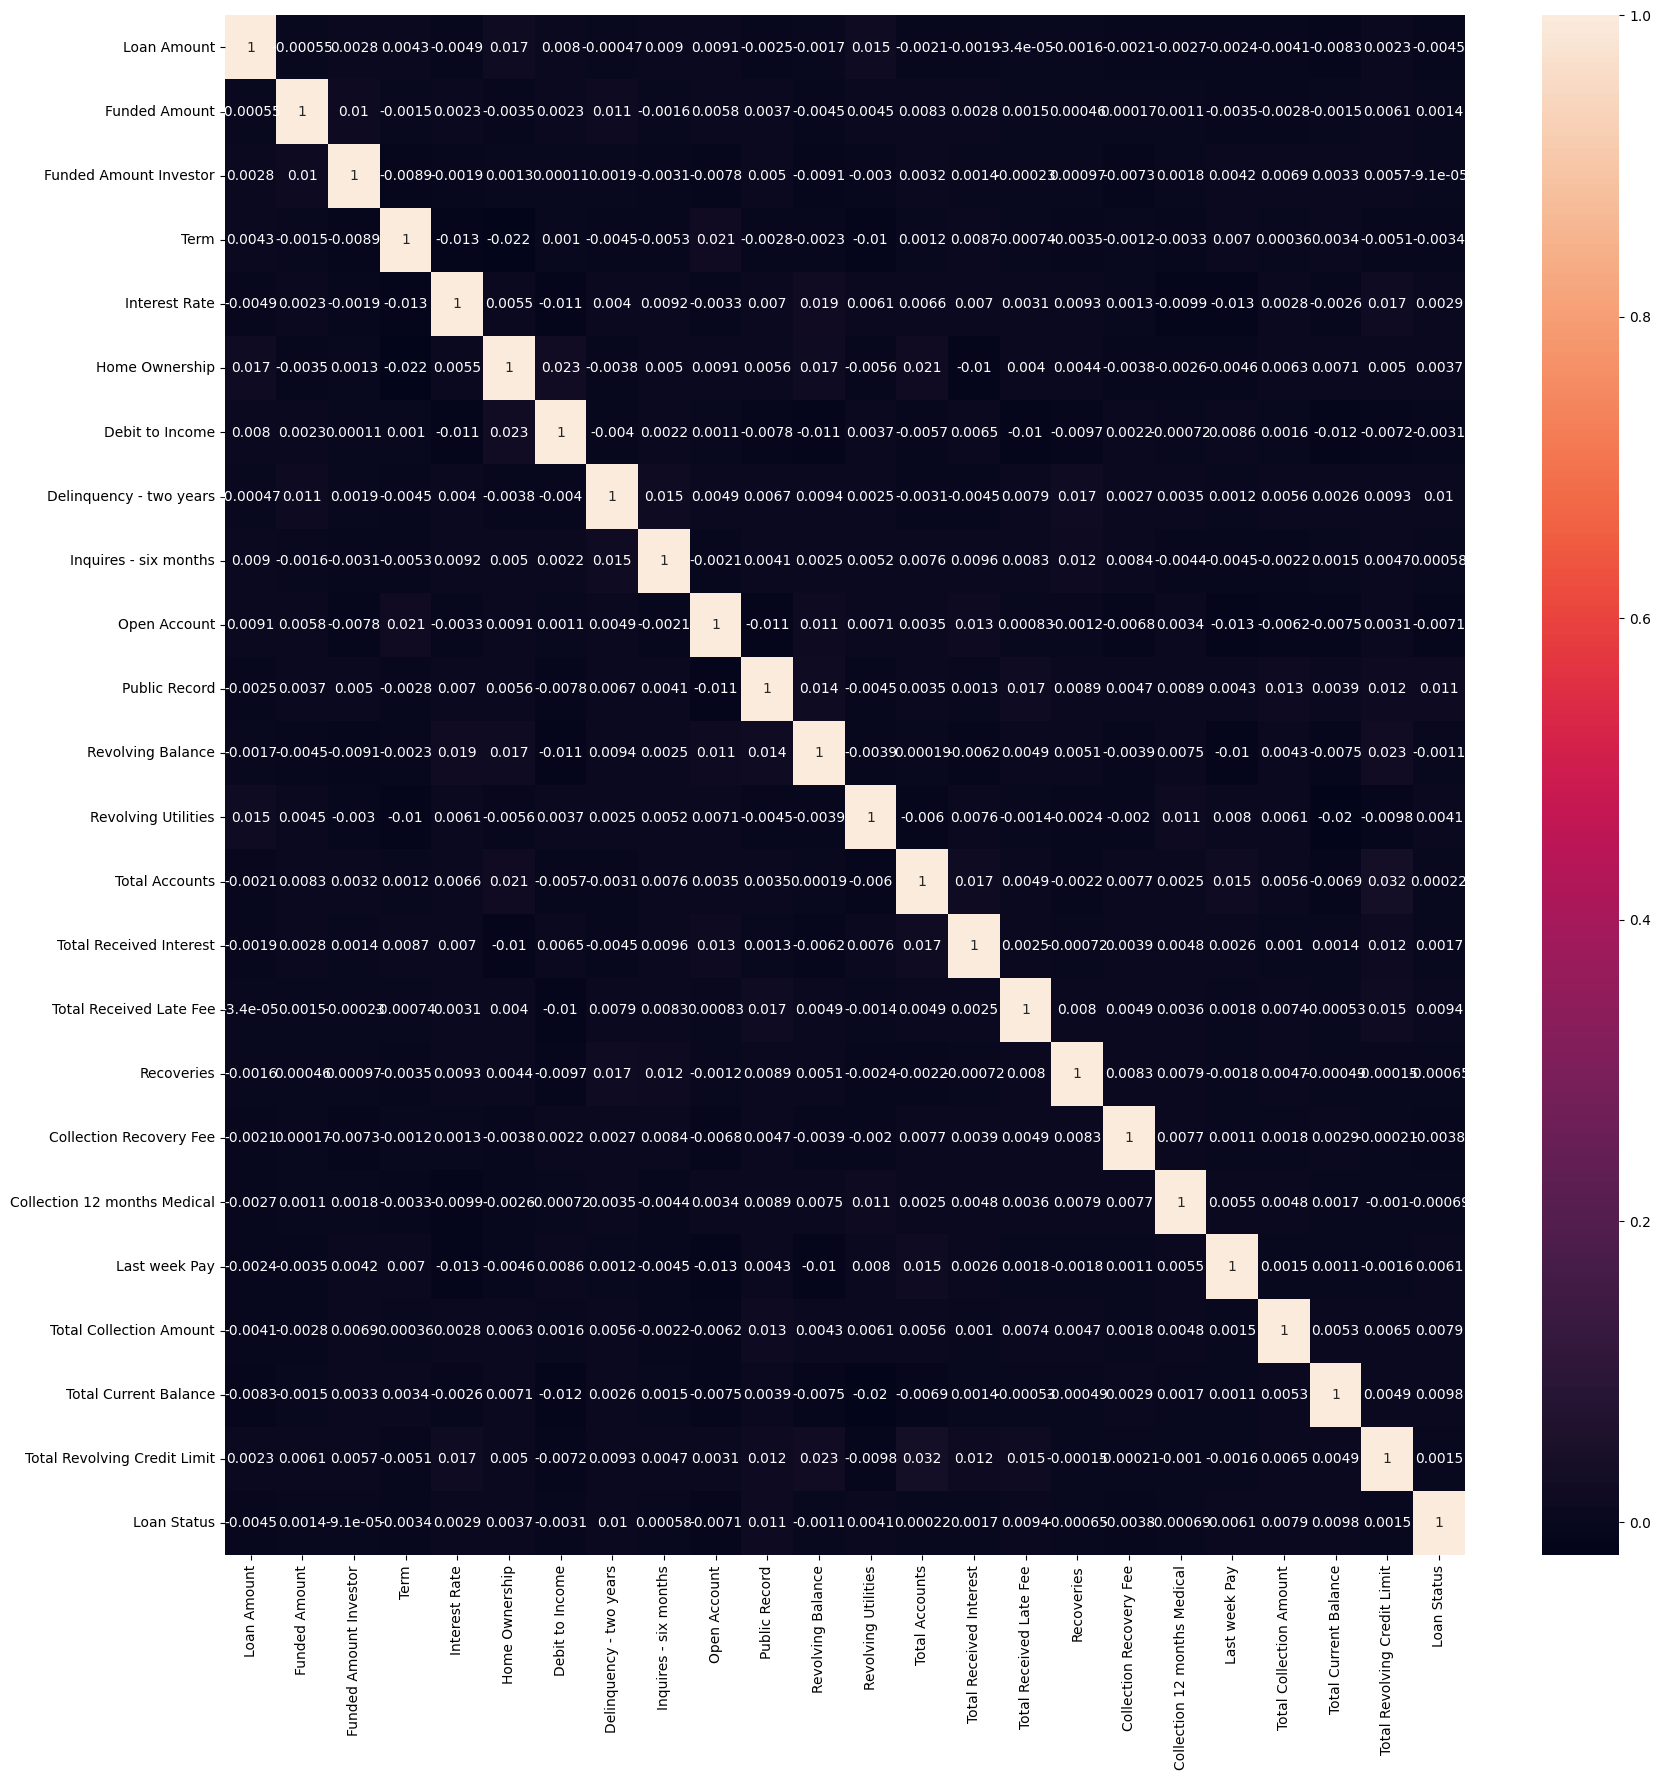

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

## 채무불이행은 기간이 짧을수록, 신용카드 한도가 높을수록, 연체료가 높을수록, 이자율이 높을수록, 계좌가 많을수록, 계좌개설이 적을수록, 집이 대출받아 있을수록 확률이 높아진다.

# 카드사나 은행의 채무불이행을 막기위한 방법

1. 신용카드 한도를 낮춘다.
2. 계좌 개수에 한도를 둔다.
3. 계좌 개설 주기를 제한한다.
4. 기간한정으로 연체료를 낮춘다.